# NLP Practice Assignments
    Day 3
    1. Sentiment Analysis:
    Problem:
        Analyzing sentiment in customer reviews, social media comments, or product 
        feedback to determine whether the sentiment is positive, negative, or neutral.
    Dataset:
        IMDb movie reviews dataset
        Twitter sentiment analysis dataset
        Amazon product reviews dataset.

    2. Text Classification:
    Problem: 
        Categorizing text documents into predefined categories or classes, such as 
        classifying news articles into topics like sports, politics, technology, etc.
    Dataset: 
        20 Newsgroups dataset
        Reuters news dataset
        spam email classification dataset.

    3. Named Entity Recognition (NER):
    Problem: 
        Identifying and classifying entities mentioned in text, such as names of persons, 
        organizations, locations, dates, etc.
    Dataset:
        CoNLL 2003 dataset
        OntoNotes dataset
        WikiNER datase

# 1. Sentiment Analysis:
    Problem:
        Analyzing sentiment in customer reviews, social media comments, or product 
        feedback to determine whether the sentiment is positive, negative, or neutral.


    Dataset:
        IMDb movie reviews dataset
        Twitter sentiment analysis dataset
        Amazon product reviews dataset.



In [1]:
# here we take twitter sentimate dataset

import pandas as pd

# Assuming the dataset file is named 'Tweets.csv'
twitter_data = pd.read_csv('Tweets.csv')

# Display the first few rows of the dataset
print(twitter_data.head())

       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           neutral                        1.0000   
1  5.703010e+17          positive                        0.3486   
2  5.703010e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703010e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

   airline_sentiment_gold        name  negativereason_gold  retweet_count  \
0                     NaN     cairdin                  NaN            0.0   
1                     NaN    jnardino                  NaN      

In [2]:
# Assuming 'text' is the column containing tweet text and 'airline_sentiment' is the sentiment label
twitter_data = twitter_data[['text', 'airline_sentiment']]
twitter_data.dropna(inplace=True)

# Display the first few rows after preprocessing
print(twitter_data.head())

                                                text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative


# Text Preprocessing:

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = re.sub('@[^\s]+', '', text)  # Remove mentions
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

# Apply text preprocessing to the 'text' column
twitter_data['cleaned_text'] = twitter_data['text'].apply(preprocess_text)
print(twitter_data[['text', 'cleaned_text', 'airline_sentiment']].head())


                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text airline_sentiment  
0                                               said           neutral  
1                       plu ad commerci experi tacki          positive  
2               today must mean need take anoth trip           neutral  
3  realli aggress blast obnoxi entertain guest fa...          negative  
4                               realli big bad thing          negative  


# Feature Extraction (TF-IDF Vectorization):

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'cleaned_text' is the preprocessed text
X = twitter_data['cleaned_text']
y = twitter_data['airline_sentiment']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_vectorized = tfidf_vectorizer.transform(X_test).toarray()

print("TF-IDF Vectorization Completed.")

TF-IDF Vectorization Completed.


# Train a Sentiment Analysis Model (Naive Bayes):

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Sentiment Analysis Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Sentiment Analysis Model Training Completed.")


Sentiment Analysis Model Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

    negative       0.65      0.93      0.76        55
     neutral       0.60      0.32      0.41        38
    positive       0.71      0.56      0.63        27

    accuracy                           0.65       120
   macro avg       0.65      0.60      0.60       120
weighted avg       0.65      0.65      0.62       120

Sentiment Analysis Model Training Completed.


# Unseen Text Prediction:

In [6]:
# Example unseen text
unseen_text = ["Great airline experience!",
               "I'm not happy with the service."]

# Preprocess the unseen text
cleaned_unseen_text = [preprocess_text(text) for text in unseen_text]

# Transform using TF-IDF vectorizer
unseen_text_vectorized = tfidf_vectorizer.transform(cleaned_unseen_text).toarray()

# Make predictions
predictions_unseen = naive_bayes_classifier.predict(unseen_text_vectorized)

# Display predictions for unseen text:
print("\nPredictions for Unseen Text:")
for text, prediction in zip(unseen_text, predictions_unseen):
    sentiment = "Positive" if prediction == 'positive' else "Negative" if prediction == 'negative' else "Neutral"
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")


Predictions for Unseen Text:
Text: Great airline experience!
Predicted Sentiment: Positive

Text: I'm not happy with the service.
Predicted Sentiment: Positive



# 2. Text Classification:
    Problem: 
        Categorizing text documents into predefined categories or classes, such as 
        classifying news articles into topics like sports, politics, technology, etc.
    Dataset: 
        20 Newsgroups dataset
        Reuters news dataset
        spam email classification dataset.

In [11]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

# Load a subset of the 20 Newsgroups dataset (e.g., first 100 rows)
newsgroups_data_subset = fetch_20newsgroups(subset='all', shuffle=True, remove=('headers', 'footers', 'quotes'))
df_newsgroups_subset = pd.DataFrame({'text': newsgroups_data_subset.data[:100], 'category': [newsgroups_data_subset.target_names[i] for i in newsgroups_data_subset.target[:100]]})

# Display the first few rows of the subset
print("Subset of 20 Newsgroups Dataset")
print(df_newsgroups_subset.head())
print("\n")


Subset of 20 Newsgroups Dataset
                                                text                  category
0  \n\nI am sure some bashers of Pens fans are pr...          rec.sport.hockey
1  My brother is in the market for a high-perform...  comp.sys.ibm.pc.hardware
2  \n\n\n\n\tFinally you said what you dream abou...     talk.politics.mideast
3  \nThink!\n\nIt's the SCSI card doing the DMA t...  comp.sys.ibm.pc.hardware
4  1)    I have an old Jasmine drive which I cann...     comp.sys.mac.hardware




In [14]:
# Text Preprocessing for the Subset
df_newsgroups_subset['cleaned_text'] = df_newsgroups_subset['text'].apply(preprocess_text)
print("Text Preprocessing for Subset")
print(df_newsgroups_subset[['text', 'cleaned_text', 'category']].head())
print("\n")

Text Preprocessing for Subset
                                                text  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                                        cleaned_text                  category  
0  sure basher pen fan pretti confus lack kind po...          rec.sport.hockey  
1  brother market high perform video card support...  comp.sys.ibm.pc.hardware  
2  final said dream mediterranean new area greate...     talk.politics.mideast  
3  think scsi card dma transfer disk scsi card dm...  comp.sys.ibm.pc.hardware  
4  old jasmin drive cannot use new system underst...     comp.sys.mac.hardware  




In [15]:
# Feature Extraction (TF-IDF Vectorization)
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'cleaned_text' is the preprocessed text
X_newsgroups_subset = df_newsgroups_subset['cleaned_text']
y_newsgroups_subset = df_newsgroups_subset['category']

# Vectorize the text using TF-IDF for the subset
tfidf_vectorizer_newsgroups_subset = TfidfVectorizer(max_features=5000)
X_vectorized_newsgroups_subset = tfidf_vectorizer_newsgroups_subset.fit_transform(X_newsgroups_subset).toarray()
print("Feature Extraction (TF-IDF Vectorization) for Subset")
print("TF-IDF Vectorization Completed.")
print("\n")

Feature Extraction (TF-IDF Vectorization) for Subset
TF-IDF Vectorization Completed.




In [16]:
# Train a Text Classification Model (Multinomial Naive Bayes) for the Subset
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the subset into training and testing sets
X_train_newsgroups_subset, X_test_newsgroups_subset, y_train_newsgroups_subset, y_test_newsgroups_subset = train_test_split(
    X_vectorized_newsgroups_subset, y_newsgroups_subset, test_size=0.2, random_state=42
)

# Train a Multinomial Naive Bayes classifier for the subset
naive_bayes_classifier_newsgroups_subset = MultinomialNB()
naive_bayes_classifier_newsgroups_subset.fit(X_train_newsgroups_subset, y_train_newsgroups_subset)

# Make predictions on the test set for the subset
y_pred_newsgroups_subset = naive_bayes_classifier_newsgroups_subset.predict(X_test_newsgroups_subset)

# Evaluate the model for the subset
accuracy_newsgroups_subset = accuracy_score(y_test_newsgroups_subset, y_pred_newsgroups_subset)
print("Text Classification Model Accuracy for Subset:", accuracy_newsgroups_subset)
print("Classification Report for Subset:\n", classification_report(y_test_newsgroups_subset, y_pred_newsgroups_subset))
print("\n")

Text Classification Model Accuracy for Subset: 0.25
Classification Report for Subset:
                           precision    recall  f1-score   support

           comp.graphics       0.00      0.00      0.00         1
 comp.os.ms-windows.misc       0.00      0.00      0.00         1
comp.sys.ibm.pc.hardware       0.00      0.00      0.00         1
   comp.sys.mac.hardware       0.20      1.00      0.33         1
          comp.windows.x       0.00      0.00      0.00         1
               rec.autos       0.00      0.00      0.00         1
         rec.motorcycles       0.08      1.00      0.15         1
      rec.sport.baseball       0.00      0.00      0.00         2
        rec.sport.hockey       1.00      1.00      1.00         3
               sci.crypt       0.00      0.00      0.00         2
         sci.electronics       0.00      0.00      0.00         2
               sci.space       0.00      0.00      0.00         1
      talk.politics.guns       0.00      0.00      0.0

C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


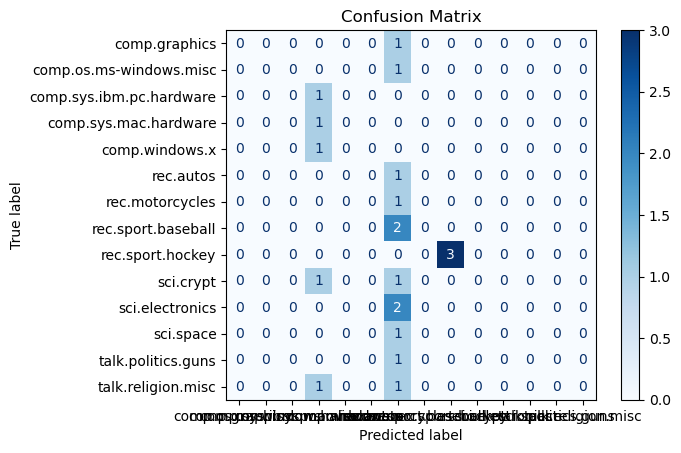

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve


# Plot Confusion Matrix
plot_confusion_matrix(naive_bayes_classifier_newsgroups_subset, X_test_newsgroups_subset, y_test_newsgroups_subset, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


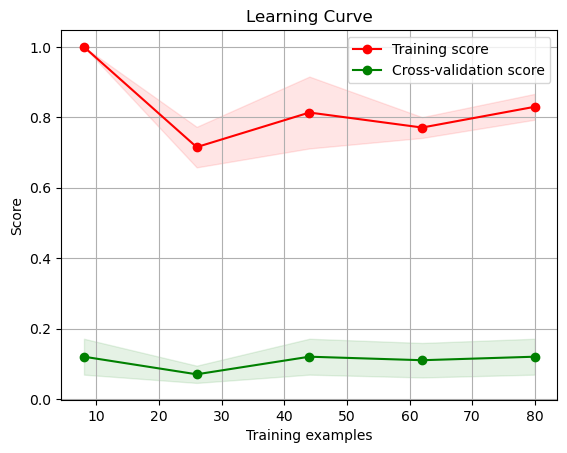

In [24]:
# Plot Learning Curve
plot_learning_curve(naive_bayes_classifier_newsgroups_subset, 'Learning Curve', X_vectorized_newsgroups_subset, y_newsgroups_subset, cv=5)
plt.show()


# 3. Named Entity Recognition (NER):
    Problem: 
        Identifying and classifying entities mentioned in text, such as names of persons, 
        organizations, locations, dates, etc.
    Dataset:
        CoNLL 2003 dataset
        OntoNotes dataset
        WikiNER dataset

In [1]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Custom text for NER
custom_text = "Tesla, founded by Elon Musk, is known for its electric cars. The company is headquartered in Palo Alto, California."

# Process the custom text using spaCy
doc = nlp(custom_text)

# Extract named entities
named_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Display the named entities
print("Named Entities:")
for entity, label in named_entities:
    print(f"{entity} - {label}")


Named Entities:
Tesla - ORG
Elon Musk - PERSON
Palo Alto - GPE
California - GPE


In [5]:
from spacy import displacy

# Visualize named entities
displacy.render(doc, style='ent', jupyter=True)

In [6]:
named_entities = [(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc.ents]
from collections import Counter

entity_types = [ent.label_ for ent in doc.ents]
entity_type_counts = Counter(entity_types)
print("Entity Type Counts:", entity_type_counts)

persons = [(ent.text, ent.start_char, ent.end_char) for ent in doc.ents if ent.label_ == 'PERSON']
print("Persons:", persons)

Entity Type Counts: Counter({'GPE': 2, 'ORG': 1, 'PERSON': 1})
Persons: [('Elon Musk', 18, 27)]
